In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from critdd import Diagram
import os

In [98]:
from reproduce_plots import collate_variants, VARIANT_MARKERS, VARIANT_COLORS, VARIANTS_DICT, VARIANT_LINESTYLES
VARIANT_NAMES = list(VARIANTS_DICT.values())
VARIANT_MARKERS["BASE"] = "x"

In [70]:
full_df = collate_variants("./reproduced_results_2")

In [71]:
# 3 individuals, 2 values, 14 datasets, 30 runs
full_df.__len__() / (3  * 14 * 30)

10.0

In [72]:
full_df.loc[("ALL", "airfoil", "best_fitness")]["fitness"].mean()

np.float64(4.980373764038086)

In [73]:
full_means = full_df.groupby(level=["variant", "dataset", "individual"]).mean()

In [74]:
full_medians = full_df.groupby(level=["variant", "dataset", "individual"]).median()

In [75]:
baseline_data = full_medians.xs(("BASE", "best_fitness"), level=['variant', 'individual'])

In [76]:
full_pcs = full_medians.sub(baseline_data, level="dataset").div(baseline_data, level="dataset") * 100

In [77]:
mean_pcs = full_pcs.groupby(level=["variant", "individual"]).mean()

In [78]:
df_final = mean_pcs.reset_index()        
df_final["variant_individual"] = df_final["variant"].astype(str) + " " + df_final["individual"].astype(str)
df_final["marker"] = df_final["variant"].astype(str).map(lambda variant_name: VARIANT_MARKERS[variant_name])
df_final["color"] = df_final["variant"].astype(str).map(lambda variant_name: VARIANT_COLORS[variant_name])
# df_final = df_final.pivot(index="variant_individual", columns=["fitness", "size"])
df_final = df_final.set_index(["variant", "individual"])

In [79]:
df_final

fitness       size  \
variant    individual                                 
ALL        best_fitness       -39.290905  -9.435984   
           best_size          -31.434450 -92.528061   
           optimal_compromise -37.250478 -61.932308   
ALL - AS   best_fitness       -39.619644  -7.164975   
           best_size          -31.389434 -92.402747   
           optimal_compromise -37.437677 -62.222758   
ALL - LS   best_fitness       -35.678589  -5.056846   
           best_size           25.015541 -93.068920   
           optimal_compromise -25.151425 -72.645830   
ALL - OMS  best_fitness       -35.245517  -5.496524   
           best_size          -31.149180 -92.273068   
           optimal_compromise -33.995091 -58.010039   
ALL - PT   best_fitness       -39.658446  -4.212587   
           best_size          -37.159426 -45.110533   
           optimal_compromise -39.639111 -30.790926   
BASE       best_fitness         0.000000   0.000000   
           best_size            7.014834 -38.051511   
           optimal_compromise   2.163992 -21.827538   
BASE + AS  best_fitness         0.000000  -2.952858   
           best_size            6.989919 -39.751716   
           optimal_compromise   2.169687 -24.828998   
BASE + LS  best_fitness       -36.217177  -0.687268   
           best_size          -34.339493 -42.489265   
           optimal_compromise -35.963803 -26.814244   
BASE + OMS best_fitness       -36.794644  -0.119272   
           best_size          -27.290841 -38.915741   
           optimal_compromise -34.969410 -26.113046   
BASE + PT  best_fitness         2.988790  -5.827720   
           best_size           21.832929 -92.669329   
           optimal_compromise   8.639271 -52.621420   

                                          variant_individual marker    color  
variant    individual                                                         
ALL        best_fitness                     ALL best_fitness      *  #000000  
           best_size                           ALL best_size      *  #000000  
           optimal_compromise         ALL optimal_compromise      *  #000000  
ALL - AS   best_fitness                ALL - AS best_fitness      s  #3377FF  
           best_size                      ALL - AS best_size      s  #3377FF  
           optimal_compromise    ALL - AS optimal_compromise      s  #3377FF  
ALL - LS   best_fitness                ALL - LS best_fitness      d  #9933FF  
           best_size                      ALL - LS best_size      d  #9933FF  
           optimal_compromise    ALL - LS optimal_compromise      d  #9933FF  
ALL - OMS  best_fitness               ALL - OMS best_fitness      ^  #33FF99  
           best_size                     ALL - OMS best_size      ^  #33FF99  
           optimal_compromise   ALL - OMS optimal_compromise      ^  #33FF99  
ALL - PT   best_fitness                ALL - PT best_fitness      o  #FF3333  
           best_size                      ALL - PT best_size      o  #FF3333  
           optimal_compromise    ALL - PT optimal_compromise      o  #FF3333  
BASE       best_fitness                    BASE best_fitness      x  #000000  
           best_size                          BASE best_size      x  #000000  
           optimal_compromise        BASE optimal_compromise      x  #000000  
BASE + AS  best_fitness               BASE + AS best_fitness      s  #3377FF  
           best_size                     BASE + AS best_size      s  #3377FF  
           optimal_compromise   BASE + AS optimal_compromise      s  #3377FF  
BASE + LS  best_fitness               BASE + LS best_fitness      d  #9933FF  
           best_size                     BASE + LS best_size      d  #9933FF  
           optimal_compromise   BASE + LS optimal_compromise      d  #9933FF  
BASE + OMS best_fitness              BASE + OMS best_fitness      ^  #33FF99  
           best_size                    BASE + OMS best_size      ^  #33FF99  
           optimal_compromise  BASE + OMS optimal_compromise

/tmp/ipykernel_661762/2269554277.py:29: UserWarning: You passed a edgecolor/edgecolors ('#000000') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc = ax.scatter(size, fitness, s=70, edgecolor=color, marker=marker, label=variant_name, alpha=0.75, facecolor=markerfacecolor)


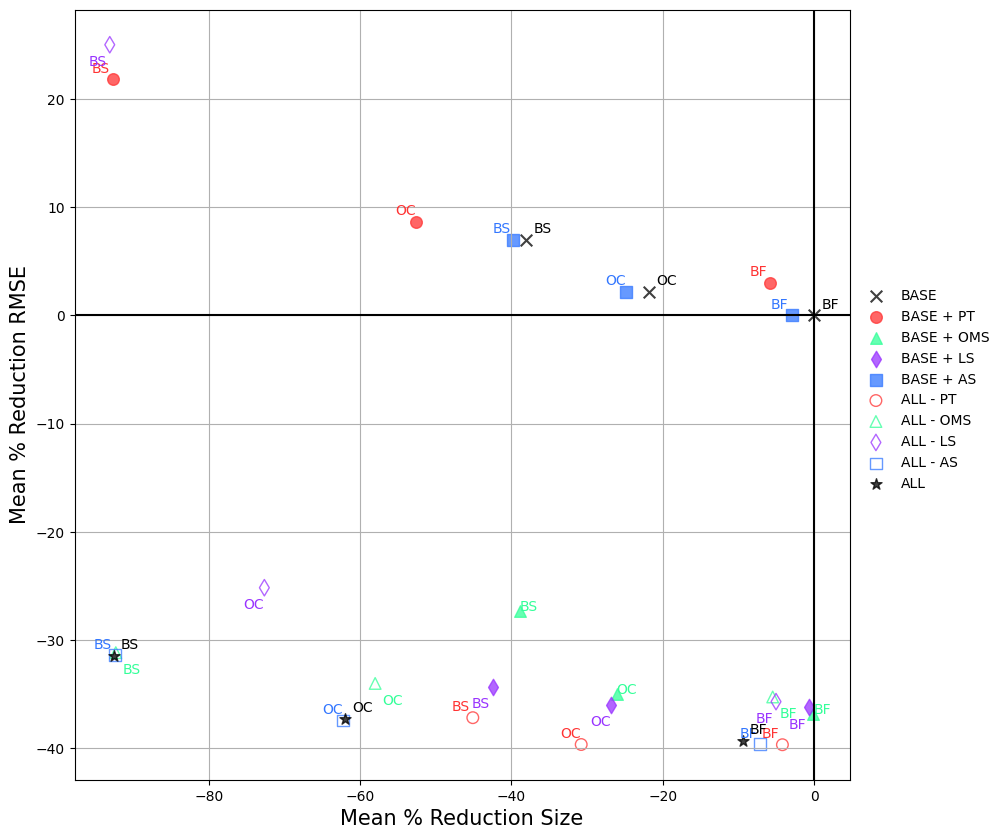

In [97]:
VARIANT_MARKERFACECOLORS = {
    "BASE": "none",
    "BASE + PT": "none",
    "BASE + OMS": "none",
    "BASE + LS": "none",
    "BASE + AS": "none",
    "ALL - PT": "none",
    "ALL - OMS": "none",
    "ALL - LS": "none",
    "ALL - AS": "none",
    "ALL": "none"
}


fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(0.0, color="black")
ax.axvline(0.0, color="black")

scatters = []
for variant_name in VARIANT_NAMES:
    for individual in ["best_fitness", "best_size", "optimal_compromise"]:
        size = df_final.loc[(variant_name, individual)]["size"]
        fitness = df_final.loc[(variant_name, individual)]["fitness"]
        color = df_final.loc[(variant_name, individual)]["color"]
        marker = df_final.loc[(variant_name, individual)]["marker"]
        markerfacecolor = color if ("+" in variant_name) or variant_name in ["ALL", "BASE"] else "none"

        sc = ax.scatter(size, fitness, s=70, edgecolor=color, marker=marker, label=variant_name, alpha=0.75, facecolor=markerfacecolor)

        if individual == "best_fitness":
            scatters.append(sc)
        
        xyoffset = (0, 0) 
        if variant_name in ["ALL", "BASE"]:
            xyoffset = (5, 5) 
        if variant_name in ["BASE + PT", "ALL - PT", "BASE + AS", "ALL - AS"]:
            xyoffset = (-15, 5) 
        if variant_name in ["BASE + LS", "ALL - LS"]:
            xyoffset = (-15, -15)
        if variant_name in ["ALL + OMS", "ALL - OMS"]:
            xyoffset = (5, -15) 

        if individual == "optimal_compromise":  # Annotate only one type
            ax.annotate("OC", (size, fitness), 
                        fontsize=10, xytext=xyoffset, textcoords='offset points', color=color)
        if individual == "best_fitness":  # Annotate only one type
            ax.annotate("BF", (size, fitness), 
                        fontsize=10, xytext=xyoffset, textcoords='offset points', color=color)
        if individual == "best_size":  # Annotate only one type
            ax.annotate("BS", (size, fitness), 
                        fontsize=10, xytext=xyoffset, textcoords='offset points', color=color)
        
ax.set_xlabel("Mean % Reduction Size", fontsize=15)
ax.set_ylabel("Mean % Reduction RMSE", fontsize=15)

ax.grid()
fig.legend(
    handles=scatters,
    loc='center left',             # Position at bottom center
    labels=list(VARIANTS_DICT.values()),
    bbox_to_anchor=(0.90, 0.5),     # Fine-tune position (x, y)
    ncol=1,                         # Number of columns in legend
    frameon=False,                    # Optional: add frame,
    fontsize=10
) 
plt.show()

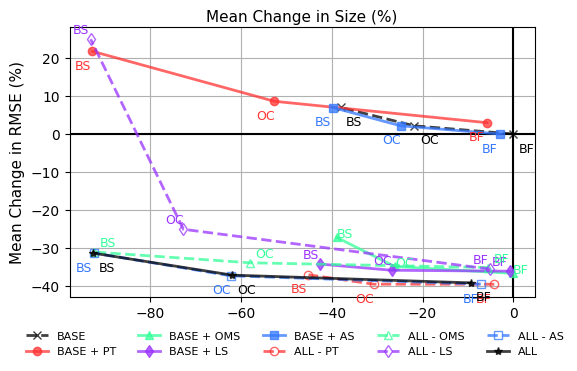

In [159]:
fig, ax = plt.subplots(figsize=(6, 3.5))

ax.axhline(0.0, color="black")
ax.axvline(0.0, color="black")

lines = []
for variant_name in VARIANT_NAMES:

    xs = []
    ys = []

    # if not variant_name in ["BASE + PT", "ALL", "ALL - LS", "ALL - OMS", "ALL - AS"]: continue
    # if not variant_name in ["BASE + OMS", "BASE + LS", "ALL - PT", "ALL - AS", "ALL"]: continue

    for individual in ["best_fitness", "optimal_compromise", "best_size"]:

        # sc = ax.scatter(size, fitness, s=70, edgecolor=color, marker=marker, label=variant_name, alpha=0.75, facecolor=markerfacecolor)

        # if individual == "best_fitness":
        #     scatters.append(sc)
        
        fitness = df_final.loc[(variant_name, individual)]["fitness"]
        size = df_final.loc[(variant_name, individual)]["size"]
        color = df_final.loc[(variant_name, individual)]["color"]
        
        xs.append(size)
        ys.append(fitness)

        xyoffset = (0, 0) 
        if variant_name in ["ALL", "BASE"]:
            xyoffset = (4, -13) 
        if variant_name in ["BASE + PT", "ALL - PT", "BASE + AS", "ALL - AS"]:
            xyoffset = (-13, -13) 
        if variant_name in ["BASE + LS", "ALL - LS"]:
            xyoffset = (-13, 4)
        if variant_name in ["ALL + OMS", "ALL - OMS"]:
            xyoffset = (4, 4) 

        if individual == "optimal_compromise":  # Annotate only one type
            ax.annotate("OC", (size, fitness), 
                        fontsize=9, xytext=xyoffset, textcoords='offset points', color=color)
        if individual == "best_fitness":  # Annotate only one type
            ax.annotate("BF", (size, fitness), 
                        fontsize=9, xytext=xyoffset, textcoords='offset points', color=color)
        if individual == "best_size":  # Annotate only one type
            ax.annotate("BS", (size, fitness),             
                        fontsize=9, xytext=xyoffset, textcoords='offset points', color=color)
        
    individual = "best_fitness"
    color = df_final.loc[(variant_name, individual)]["color"]
    marker = df_final.loc[(variant_name, individual)]["marker"]
    markerfacecolor = color if ("+" in variant_name) or variant_name in ["ALL", "BASE"] else "none"
    

    line, = ax.plot(
        xs, ys, 
        linewidth=2, markersize=6,
        marker=VARIANT_MARKERS[variant_name],
        markeredgecolor=color,
        markerfacecolor=markerfacecolor,
        linestyle=VARIANT_LINESTYLES[variant_name],
        color=VARIANT_COLORS[variant_name],
        label=variant_name, alpha=0.75
    )
    lines.append(line)

ax.set_xlabel("Mean Change in Size (%)", fontsize=11)
ax.set_ylabel("Mean Change in RMSE (%)", fontsize=11)
ax.xaxis.set_label_position("top")

ax.grid()
"""
fig.legend(
    handles=lines,
    loc='center left',             # Position at bottom center
    labels=list(VARIANTS_DICT.values()),
    bbox_to_anchor=(0.90, 0.5),     # Fine-tune position (x, y)
    ncol=1,                         # Number of columns in legend
    frameon=False,                    # Optional: add frame,
    fontsize=9
) 
"""
fig.legend(
    handles=lines,
    loc='upper center',             # Position at bottom center
    labels=list(VARIANTS_DICT.values()),
    bbox_to_anchor=(0.5, 0.04),     # Fine-tune position (x, y)
    ncol=5,                         # Number of columns in legend
    frameon=False,                    # Optional: add frame,
    fontsize=8
) 
# plt.show()
plt.savefig("reproduced_plots/full_pareto.pdf", format="pdf", bbox_inches='tight')

In [81]:
from reproduce_results import DATASET_LOADERS
DATASET_NAMES = list(DATASET_LOADERS.keys())
full_medians.loc[[("ALL", "airfoil", "best_fitness")] + [("ALL", "airfoil", "best_size")]]

fitness  size
variant dataset individual                  
ALL     airfoil best_fitness  4.869670  53.0
                best_size     5.709083   6.0

In [82]:
full_medians.loc[[("ALL", ds, "best_fitness") for ds in DATASET_NAMES] + [("ALL", ds, "best_size") for ds in DATASET_NAMES] + [("ALL", ds, "optimal_compromise") for ds in DATASET_NAMES]
                 + [("BASE", ds, "best_fitness") for ds in DATASET_NAMES]]

fitness  size
variant dataset                individual                           
ALL     airfoil                best_fitness           4.869670  53.0
        bike_sharing           best_fitness         389.367340  43.0
        bioavailability        best_fitness          31.457026  42.0
        boston                 best_fitness           4.795592  43.0
        breast_cancer          best_fitness           0.261432  40.0
        concrete_slump         best_fitness           8.159232  48.0
        concrete_strength      best_fitness           9.691688  48.0
        diabetes               best_fitness          57.203016  36.0
        efficiency_cooling     best_fitness           3.302896  47.0
        efficiency_heating     best_fitness           3.075034  49.0
        forest_fires           best_fitness           1.394513  41.0
        parkinson_updrs        best_fitness           9.896937  45.0
        ppb                    best_fitness          32.001328  39.0
        resid_build_sale_price best_fitness          60.199841  36.0
        airfoil                best_size              5.709083   6.0
        bike_sharing           best_size            585.680359   3.0
        bioavailability        best_size             30.974394   3.0
        boston                 best_size              5.839152   3.0
        breast_cancer          best_size              0.307379   3.0
        concrete_slump         best_size              7.948911   3.0
        concrete_strength      best_size             13.625695   5.0
        diabetes               best_size             61.385460   3.0
        efficiency_cooling     best_size              3.841045   5.0
        efficiency_heating     best_size              4.113044   5.0
        forest_fires           best_size              1.391799   3.0
        parkinson_updrs        best_size             10.144464   3.0
        ppb                    best_size             31.157453   3.0
        resid_build_sale_price best_size             82.366879   3.0
        airfoil                optimal_compromise     5.034732  20.0
        bike_sharing           optimal_compromise   456.539825  19.0
        bioavailability        optimal_compromise    31.333086  20.0
        boston                 optimal_compromise     5.067148  17.0
        breast_cancer          optimal_compromise     0.276309  14.0
        concrete_slump         optimal_compromise     8.107699  21.0
        concrete_strength      optimal_compromise    10.755728  19.0
        diabetes               optimal_compromise    57.664381  16.0
        efficiency_cooling     optimal_compromise     3.469434  19.0
        efficiency_heating     optimal_compromise     3.328781  23.0
        forest_fires           optimal_compromise     1.390208  19.0
        parkinson_updrs        optimal_compromise     9.993967  17.0
        ppb                    optimal_compromise    31.667576  19.0
        resid_build_sale_price optimal_compromise    63.681063  13.0
BASE    airfoil                best_fitness          57.007883  58.0
        bike_sharing           best_fitness        1035.187012  49.0
        bioavailability        best_fitness          46.812313  40.0
        boston                 best_fitness           9.273700  49.0
        breast_cancer          best_fitness           0.314149  39.0
        concrete_slump         best_fitness           9.563157  57.0
        concrete_strength      best_fitness          22.812025  52.0
        diabetes               best_fitness         154.046051  60.0
        efficiency_cooling     best_fitness           5.749604  56.0
        efficiency_heating     best_fitness           6.081463  53.0
        forest_fires           best_fitness           1.387762  41.0
        parkinson_updrs        best_fitness          11.684770  51.0
        ppb                    best_fitness          36.869474  39.0
        resid_build_sale_price best_fitness         106.148720  39.0

In [83]:
# want to combine
# - variant_individual
# df_temp = df.reset_index()
# df_temp["AC"] = df_temp["A"].astype(str) + "_" + df_temp["C"].astype(str)
# df_pivoted = df_temp.pivot(index="B", columns="AC", values=df.columns.tolist())

# df_cdd = full_medians.reorder_levels(["variant", "individual", "dataset"]).reset_index(["variant", "individual"])
# df_cdd["variant_individual"] = df_cdd["variant"].astype(str) + " " + df_cdd["individual"].astype(str)
# df_cdd = df_cdd.set_index("variant_individual", append=True).reorder_levels(["variant_individual", "dataset"])
# df_cdd = df_cdd.drop(columns=["variant", "individual"])

In [84]:
df_cdd_optimal = full_medians.xs("optimal_compromise", level=2).reset_index()
df_cdd_optimal = df_cdd_optimal.pivot(index="dataset", columns="variant")

In [85]:
diagram = Diagram(
    df_cdd_optimal["fitness"].to_numpy(),
    treatment_names=df_cdd_optimal["fitness"].columns,
    maximize_outcome=False
)

/home/lachlanjs/Repositories/species-ss-slim-gsgp/.venv/lib/python3.10/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [86]:
diagram.average_ranks # the average rank of each treatment
# diagram.get_groups(alpha=.05, adjustment="holm")

array([3.53571429, 3.39285714, 6.42857143, 4.5       , 2.        ,
       8.39285714, 8.46428571, 4.        , 4.35714286, 9.92857143])

In [87]:
os.environ["PATH"] += ":/usr/local/texlive/2025/bin/x86_64-linux"

In [88]:
df_cdd_optimal

fitness                                      \
variant                        ALL    ALL - AS    ALL - LS   ALL - OMS   
dataset                                                                  
airfoil                   5.034732    5.034732   16.140301    5.617082   
bike_sharing            456.539825  452.932327  759.094238  584.546570   
bioavailability          31.333086   31.226497   31.880731   31.069393   
boston                    5.067148    5.067148    6.468637    5.606843   
breast_cancer             0.276309    0.276309    0.313415    0.272946   
concrete_slump            8.107699    7.949122    8.346622    7.916509   
concrete_strength        10.755728   10.599205   13.904643   12.285376   
diabetes                 57.664381   57.678032   78.937202   59.050306   
efficiency_cooling        3.469434    3.479699    4.584055    3.613909   
efficiency_heating        3.328781    3.390787    4.958387    3.738341   
forest_fires              1.390208    1.390208    1.386615    1.385379   
parkinson_updrs           9.993967    9.996900   10.428106   10.079953   
ppb                      31.667576   31.323821   30.799860   30.077131   
resid_build_sale_price   63.681063   63.681063   79.802940   81.805809   

                                                                          \
variant                   ALL - PT         BASE    BASE + AS   BASE + LS   
dataset                                                                    
airfoil                   4.996016    57.534157    57.534157    5.563802   
bike_sharing            380.704086  1036.190369  1036.190369  584.170776   
bioavailability          30.607121    47.398724    47.398724   31.045546   
boston                    4.862624     9.426637     9.434031    5.398883   
breast_cancer             0.261209     0.355359     0.355359    0.257805   
concrete_slump            8.154112     9.716620     9.716620    7.988271   
concrete_strength         9.255052    23.576157    23.576157    9.575054   
diabetes                 57.796165   154.711189   154.711189   58.164179   
efficiency_cooling        3.329237     5.984716     5.984716    3.541753   
efficiency_heating        2.995885     6.151595     6.151595    3.215698   
forest_fires              1.379830     1.395829     1.395829    1.413241   
parkinson_updrs           9.913610    11.806863    11.806863   10.039729   
ppb                      30.402923    36.979488    36.979488   30.205249   
resid_build_sale_price   65.062351   106.894600   106.894600   80.983387   

                                                 size                    \
variant                 BASE + OMS    BASE + PT   ALL ALL - AS ALL - LS   
dataset                                                                   
airfoil                   5.268381    60.566769  20.0     21.0     11.0   
bike_sharing            618.451447  1039.016052  19.0     19.0     21.0   
bioavailability          30.605408    48.679224  20.0     19.0      9.0   
boston                    5.788058    10.092938  17.0     17.0     14.0   
breast_cancer             0.277786     0.383483  14.0     15.0     11.0   
concrete_slump            7.698610    10.256521  21.0     17.0     11.0   
concrete_strength         9.644848    25.700822  19.0     21.0     11.0   
diabetes                 71.010681   157.260887  16.0     17.0     11.0   
efficiency_cooling        3.691547     7.627475  19.0     18.0     11.0   
efficiency_heating        3.544000     7.042978  23.0     23.0     14.0   
forest_fires              1.393250     1.397230  19.0     19.0     20.0   
parkinson_updrs          10.172893    12.144903  17.0     17.0     11.0   
ppb                      29.944324    37.729963  19.0     19.0     15.0   
resid_build_sale_price   69.200588   108.291096  13.0     12.0     11.0   

                                                                     \
variant                ALL - OMS ALL - PT  BASE BASE + AS BASE + LS   
dataset                                                  

In [89]:
df_cdd = full_medians.reset_index()
df_cdd["variant_individual"] = df_cdd["variant"].astype(str) + " " + df_cdd["individual"].astype(str)
df_cdd = df_cdd.pivot(index="dataset", columns="variant_individual")
df_cdd = df_cdd.drop(columns=[("fitness", "BASE optimal_compromise"), ("size", "BASE optimal_compromise"), ("fitness", "BASE best_size"), ("size", "BASE best_size")])

In [90]:
len(df_cdd["fitness"].columns)

28

In [91]:
df_cdd["fitness"].to_numpy().shape

(14, 28)

In [92]:
df_cdd["fitness"]

variant_individual,ALL - AS best_fitness,ALL - AS best_size,ALL - AS optimal_compromise,ALL - LS best_fitness,ALL - LS best_size,ALL - LS optimal_compromise,ALL - OMS best_fitness,ALL - OMS best_size,ALL - OMS optimal_compromise,ALL - PT best_fitness,...,BASE + LS best_fitness,BASE + LS best_size,BASE + LS optimal_compromise,BASE + OMS best_fitness,BASE + OMS best_size,BASE + OMS optimal_compromise,BASE + PT best_fitness,BASE + PT best_size,BASE + PT optimal_compromise,BASE best_fitness
dataset,,,,,,,,,,,,,,,,,,,,,
airfoil,4.869670,5.709083,5.034732,5.391366,66.141197,16.140301,5.591412,5.709083,5.617082,4.935412,...,5.547357,5.622964,5.563802,5.025162,6.687323,5.268381,58.150637,64.759480,60.566769,57.007883
bike_sharing,385.041199,585.680359,452.932327,603.316345,1041.968994,759.094238,584.292236,585.307281,584.546570,375.865356,...,583.864838,584.569031,584.170776,592.567627,664.972198,618.451447,1036.008972,1041.477844,1039.016052,1035.187012
bioavailability,31.372347,30.743971,31.226497,30.050550,54.795244,31.880731,31.180829,30.974394,31.069393,31.380723,...,31.216712,30.890759,31.045546,31.538295,31.736589,30.605408,47.420227,50.349777,48.679224,46.812313
boston,4.795592,5.839152,5.067148,5.600197,10.794069,6.468637,5.505529,5.839152,5.606843,4.806698,...,5.325985,5.658345,5.398883,5.184262,7.590272,5.788058,9.665803,10.794069,10.092938,9.273700
breast_cancer,0.265083,0.307379,0.276309,0.265833,0.548263,0.313415,0.258877,0.308304,0.272946,0.259362,...,0.256427,0.278014,0.257805,0.268529,0.317215,0.277786,0.342933,0.544341,0.383483,0.314149
concrete_slump,7.696342,7.948912,7.949122,7.566355,11.701253,8.346622,7.968863,7.948911,7.916509,8.280778,...,8.201799,8.060078,7.988271,7.774341,8.781981,7.698610,9.573983,11.701253,10.256521,9.563157
concrete_strength,9.642879,13.625695,10.599205,9.415336,29.057808,13.904643,10.865689,13.546069,12.285376,8.941060,...,8.994864,11.616042,9.575054,8.656533,12.334672,9.644848,23.562177,28.381792,25.700822,22.812025
diabetes,57.396790,61.385460,57.678032,71.426083,158.898811,78.937202,57.986435,61.385460,59.050306,56.837650,...,58.191425,58.932734,58.164179,69.613491,79.115810,71.010681,154.935081,159.638855,157.260887,154.046051
efficiency_cooling,3.300719,3.841045,3.479699,3.657645,10.377571,4.584055,3.484635,3.877770,3.613909,3.287148,...,3.458689,3.580732,3.541753,3.525055,4.288557,3.691547,6.590137,10.227380,7.627475,5.749604


In [93]:
diagram = Diagram(
    df_cdd["fitness"].to_numpy(),
    treatment_names=df_cdd["fitness"].columns,
    maximize_outcome=False
)

/home/lachlanjs/Repositories/species-ss-slim-gsgp/.venv/lib/python3.10/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [ ]:
df_cdd["fitness"]

variant_individual,ALL - AS best_fitness,ALL - AS best_size,ALL - AS optimal_compromise,ALL - LS best_fitness,ALL - LS best_size,ALL - LS optimal_compromise,ALL - OMS best_fitness,ALL - OMS best_size,ALL - OMS optimal_compromise,ALL - PT best_fitness,...,BASE + LS optimal_compromise,BASE + OMS best_fitness,BASE + OMS best_size,BASE + OMS optimal_compromise,BASE + PT best_fitness,BASE + PT best_size,BASE + PT optimal_compromise,BASE best_fitness,BASE best_size,BASE optimal_compromise
dataset,,,,,,,,,,,,,,,,,,,,,
airfoil,4.869670,5.709083,5.034732,5.391366,66.141197,16.140301,5.591412,5.709083,5.617082,4.935412,...,5.563802,5.025162,6.687323,5.268381,58.150637,64.759480,60.566769,57.007883,59.175613,57.534157
bike_sharing,385.041199,585.680359,452.932327,603.316345,1041.968994,759.094238,584.292236,585.307281,584.546570,375.865356,...,584.170776,592.567627,664.972198,618.451447,1036.008972,1041.477844,1039.016052,1035.187012,1037.273926,1036.190369
bioavailability,31.372347,30.743971,31.226497,30.050550,54.795244,31.880731,31.180829,30.974394,31.069393,31.380723,...,31.045546,31.538295,31.736589,30.605408,47.420227,50.349777,48.679224,46.812313,48.263597,47.398724
boston,4.795592,5.839152,5.067148,5.600197,10.794069,6.468637,5.505529,5.839152,5.606843,4.806698,...,5.398883,5.184262,7.590272,5.788058,9.665803,10.794069,10.092938,9.273700,9.697941,9.426637
breast_cancer,0.265083,0.307379,0.276309,0.265833,0.548263,0.313415,0.258877,0.308304,0.272946,0.259362,...,0.257805,0.268529,0.317215,0.277786,0.342933,0.544341,0.383483,0.314149,0.470136,0.355359
concrete_slump,7.696342,7.948912,7.949122,7.566355,11.701253,8.346622,7.968863,7.948911,7.916509,8.280778,...,7.988271,7.774341,8.781981,7.698610,9.573983,11.701253,10.256521,9.563157,9.971437,9.716620
concrete_strength,9.642879,13.625695,10.599205,9.415336,29.057808,13.904643,10.865689,13.546069,12.285376,8.941060,...,9.575054,8.656533,12.334672,9.644848,23.562177,28.381792,25.700822,22.812025,24.971380,23.576157
diabetes,57.396790,61.385460,57.678032,71.426083,158.898811,78.937202,57.986435,61.385460,59.050306,56.837650,...,58.164179,69.613491,79.115810,71.010681,154.935081,159.638855,157.260887,154.046051,155.874649,154.711189
efficiency_cooling,3.300719,3.841045,3.479699,3.657645,10.377571,4.584055,3.484635,3.877770,3.613909,3.287148,...,3.541753,3.525055,4.288557,3.691547,6.590137,10.227380,7.627475,5.749604,6.500166,5.984716


In [ ]:
full_means.xs("best_fitness", level=2)

fitness       size
variant   dataset                                      
ALL       airfoil                   4.980374  54.666667
          bike_sharing            297.859170  41.133333
          bioavailability          31.366466  52.733333
          boston                    4.852733  43.466667
          breast_cancer             0.263210  38.200000
...                                      ...        ...
BASE + PT efficiency_heating        7.432190  55.666667
          forest_fires              1.423510  36.466667
          parkinson_updrs          11.705413  50.400000
          ppb                      37.436683  43.466667
          resid_build_sale_price  118.838105  40.933333

[140 rows x 2 columns]

In [ ]:
full_means.xs("best_fitness", level=2)["fitness"].xs("BASE", level=0)

dataset
airfoil                    50.945184
bike_sharing              781.260078
bioavailability            47.645921
boston                      9.723581
breast_cancer               0.315840
concrete_slump              9.741921
concrete_strength          23.034561
diabetes                  154.483174
efficiency_cooling          7.360251
efficiency_heating          7.227877
forest_fires                1.430469
parkinson_updrs            11.567551
ppb                        37.209774
resid_build_sale_price    118.668566
Name: fitness, dtype: float64

In [ ]:
base_data = full_means.xs("best_fitness", level=2)["fitness"].xs("BASE", level=0)

In [ ]:
data = full_means.xs("best_fitness", level=2)["fitness"]

In [ ]:
data.loc["BASE"]

dataset
airfoil                    50.945184
bike_sharing              781.260078
bioavailability            47.645921
boston                      9.723581
breast_cancer               0.315840
concrete_slump              9.741921
concrete_strength          23.034561
diabetes                  154.483174
efficiency_cooling          7.360251
efficiency_heating          7.227877
forest_fires                1.430469
parkinson_updrs            11.567551
ppb                        37.209774
resid_build_sale_price    118.668566
Name: fitness, dtype: float64

In [ ]:
full_means.xs("best_fitness", level=2)["fitness"].loc["BASE"]

dataset
airfoil                    50.945184
bike_sharing              781.260078
bioavailability            47.645921
boston                      9.723581
breast_cancer               0.315840
concrete_slump              9.741921
concrete_strength          23.034561
diabetes                  154.483174
efficiency_cooling          7.360251
efficiency_heating          7.227877
forest_fires                1.430469
parkinson_updrs            11.567551
ppb                        37.209774
resid_build_sale_price    118.668566
Name: fitness, dtype: float64

In [ ]:
all_data = full_means.xs("best_fitness", level=2)["fitness"].xs("ALL", level=0)

In [ ]:
all_data - base_data

dataset
airfoil                   -45.964810
bike_sharing             -483.400908
bioavailability           -16.279454
boston                     -4.870849
breast_cancer              -0.052630
concrete_slump              0.213240
concrete_strength         -13.383774
diabetes                  -96.856588
efficiency_cooling         -4.054467
efficiency_heating         -4.154027
forest_fires               -0.008386
parkinson_updrs            -1.646736
ppb                         4.479856
resid_build_sale_price    -56.771727
Name: fitness, dtype: float64

In [ ]:
plt.plot(np.arange(len(all_data)), all_data - base_data)

Error in callback <function _draw_all_if_interactive at 0x7f0621f52f80> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: 'pdflatex' not found; install it or change rcParams['pgf.texsystem'] to an available TeX implementation